In [11]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, train_test_split

In [12]:
Plant_Dataset = pd.read_csv('Feature_Extracted_Plant_Dataset.csv')
Plant_Dataset.describe()

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity
count,52803.000000,52803.000000,5.280300e+04,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000
mean,441.175104,0.432590,-4.128050e-20,1043.109380,0.142318,0.476966,0.142318,0.085437,0.753024
std,190.125086,0.133243,2.009960e-17,301.178560,0.042527,0.071808,0.042527,0.062764,0.094796
min,0.000000,0.000848,-1.665335e-16,163.408944,0.029202,0.131723,0.029202,0.000000,0.367933
25%,289.000000,0.342362,-1.387779e-17,842.672999,0.111821,0.430708,0.111821,0.040853,0.688573
50%,420.000000,0.436709,0.000000e+00,1006.582372,0.140735,0.474295,0.140735,0.069160,0.758271
75%,581.000000,0.522776,1.387779e-17,1191.774667,0.169974,0.516459,0.169974,0.115961,0.820833
max,1569.000000,0.981226,1.110223e-16,3588.441038,0.363226,0.925371,0.363226,0.575310,1.000000


#### Correlation Heatmap ####

Text(0.5, 1.0, 'Heatmap of Correlation')

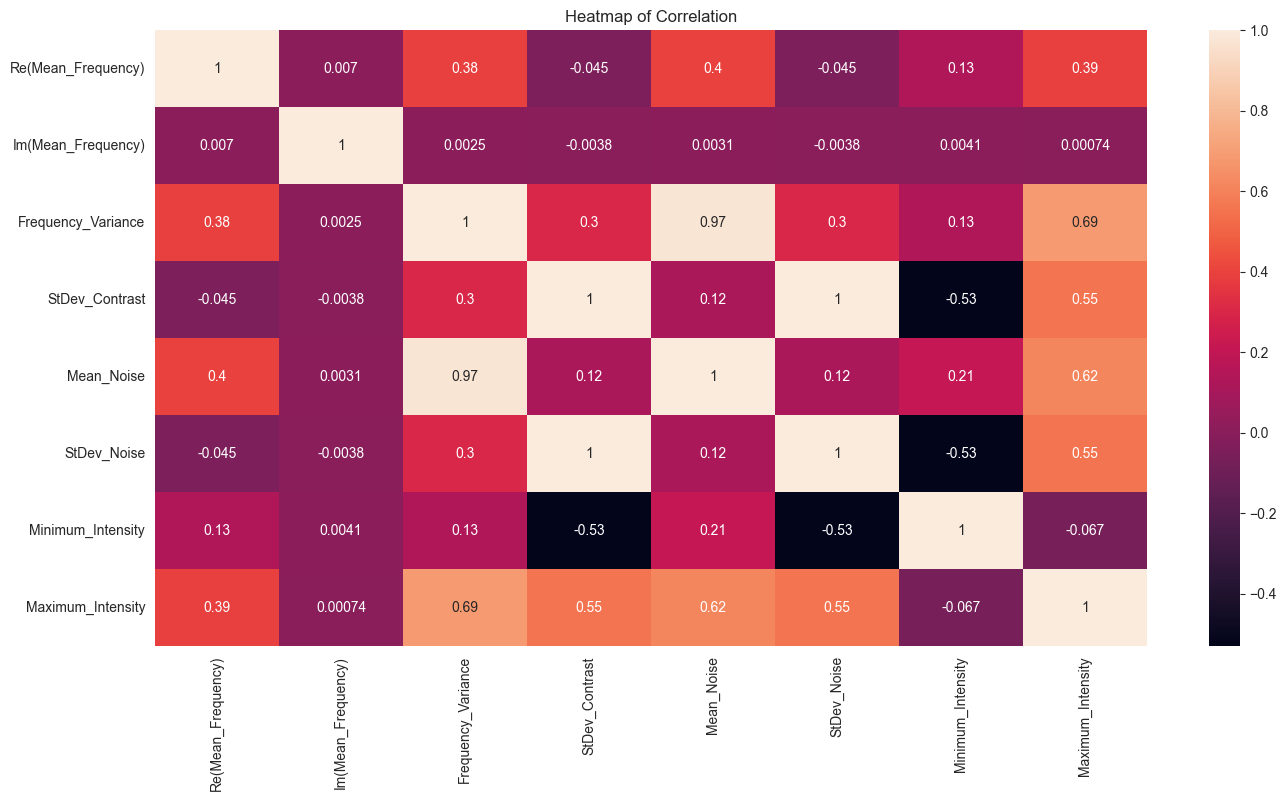

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(Plant_Dataset.select_dtypes(['float64']).corr(), annot=True)
plt.title('Heatmap of Correlation')

In [36]:
def plot_feature_importance(model):
    n_features = Plant_Dataset.shape[1] - 2
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Plant_Dataset.drop(columns=['Disease', 'Is_Healthy']).columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

    model.feature_importances_

## Train to Identify Specific Disease ##

Accuracy on training set: 0.489
Accuracy on test set: 0.447


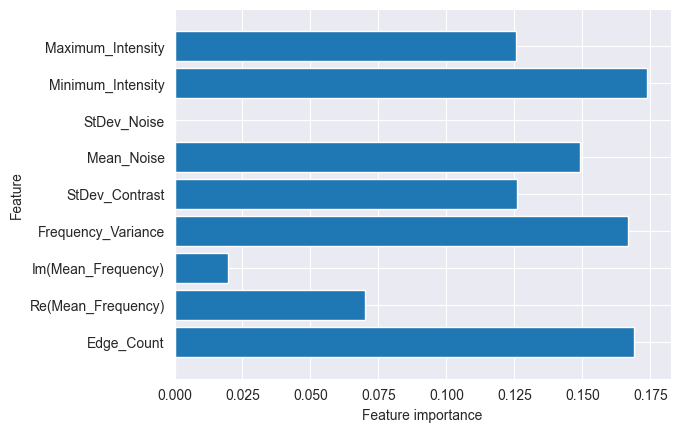

In [58]:
Label_Encoder = LabelEncoder()

X = Plant_Dataset.drop(columns=['Disease', 'Is_Healthy'])
Y = Plant_Dataset.Disease
Y = Label_Encoder.fit_transform(Y)

num_classes = len(Label_Encoder.classes_)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
XGBoost = XGBClassifier(n_estimators=64, max_depth=4, learning_rate=0.2).fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, Y_test)))

plot_feature_importance(XGBoost)

## Train to Detect Healthy vs Unhealthy ##

Accuracy on training set: 0.826
Accuracy on test set: 0.811


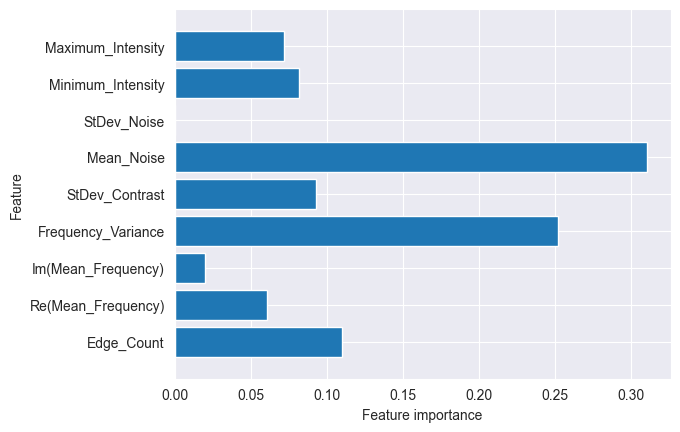

In [51]:
X = Plant_Dataset.drop(columns=['Disease', 'Is_Healthy'])
Y = Plant_Dataset.Is_Healthy

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
XGBoost = XGBClassifier(n_estimators=64, max_depth=5, learning_rate=0.2).fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, Y_test)))

plot_feature_importance(XGBoost)

## Train on Specific Plant to Reduce Generalization ##
#### 1.) Apples ####

In [71]:
Apple_Dataset = pd.read_csv('Individual Plant Datasets/Apple.csv', index_col=0)
Apple_Dataset.describe()

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity
count,3171.000000,3171.000000,3.171000e+03,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,369.557553,0.401991,1.280118e-19,971.250935,0.149750,0.457186,0.149750,0.068342,0.747142
std,134.465037,0.142399,2.147770e-17,265.417407,0.038279,0.065254,0.038279,0.056882,0.101063
min,9.000000,0.033330,-8.326673e-17,215.957236,0.042840,0.222621,0.042840,0.000000,0.373433
25%,271.000000,0.298953,-1.387779e-17,778.713393,0.125950,0.409980,0.125950,0.027142,0.676710
50%,361.000000,0.398931,0.000000e+00,962.040061,0.149084,0.458781,0.149084,0.049856,0.745834
75%,458.000000,0.498755,1.387779e-17,1114.974673,0.173002,0.498097,0.173002,0.090594,0.817994
max,900.000000,0.971464,8.760354e-17,2353.633191,0.298354,0.737125,0.298354,0.428729,1.000000


In [72]:
Apple_Dataset

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity,Is_Healthy,Disease
Apple___Cedar_apple_rust_image (263).JPG,292,0.441329,2.775558e-17,1180.628457,0.104107,0.526734,0.104107,0.074465,0.791481,False,Leaf_blight_(Isariopsis_Leaf_Spot)
Apple___Cedar_apple_rust_image (234).JPG,279,0.626644,-1.387779e-17,1205.910388,0.073736,0.537653,0.073736,0.192641,0.755704,False,Leaf_blight_(Isariopsis_Leaf_Spot)
Apple___Cedar_apple_rust_image (222).JPG,358,0.307813,2.775558e-17,1348.009422,0.146356,0.554713,0.146356,0.024333,0.790669,False,Leaf_blight_(Isariopsis_Leaf_Spot)
Apple___Cedar_apple_rust_image (275).JPG,103,0.520912,3.469447e-17,1164.341175,0.087797,0.525948,0.087797,0.267478,0.809190,False,Leaf_blight_(Isariopsis_Leaf_Spot)
Apple___Cedar_apple_rust_image (71).JPG,267,0.324708,-2.602085e-17,1323.029178,0.103372,0.558878,0.103372,0.186533,0.816386,False,Leaf_blight_(Isariopsis_Leaf_Spot)
...,...,...,...,...,...,...,...,...,...,...,...
Apple___healthy_image (562).JPG,293,0.395016,-1.387779e-17,1137.144621,0.122171,0.512577,0.122171,0.196822,0.802163,True,Healthy
Apple___healthy_image (64).JPG,292,0.355661,1.387779e-17,974.246507,0.134761,0.468747,0.134761,0.081445,0.645125,True,Healthy
Apple___healthy_image (1200).JPG,389,0.306094,6.505213e-18,888.173950,0.162524,0.436404,0.162524,0.069978,0.684883,True,Healthy
Apple___healthy_image (427).JPG,359,0.502025,3.295975e-17,1985.671416,0.236639,0.654864,0.236639,0.098949,0.914789,True,Healthy


Text(0.5, 1.0, 'Heatmap of Correlation')

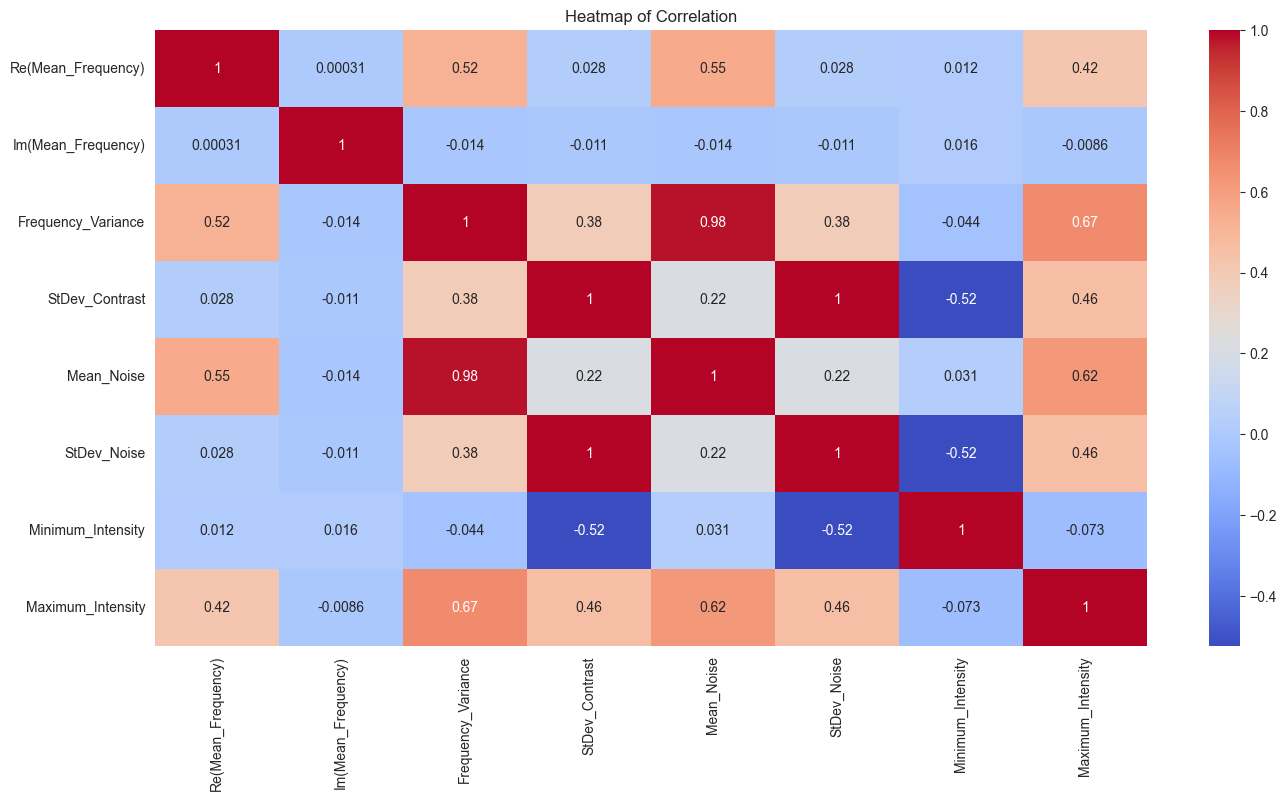

In [78]:
plt.figure(figsize=(16, 8))
sns.heatmap(Apple_Dataset.select_dtypes(['float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')

Accuracy on training set: 0.690
Accuracy on test set: 0.499


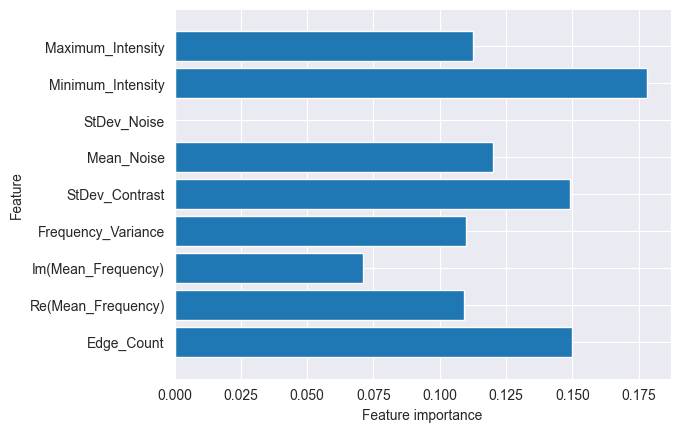

In [77]:
Label_Encoder = LabelEncoder()

X = Apple_Dataset.drop(columns=['Disease', 'Is_Healthy'])
Y = Apple_Dataset.Disease
Y = Label_Encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
XGBoost = XGBClassifier(n_estimators=64, max_depth=4, learning_rate=0.1).fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, Y_test)))

plot_feature_importance(XGBoost)

#### Cherries ####

In [92]:
Cherry_Dataset = pd.read_csv('Individual Plant Datasets/Cherry.csv', index_col=0)
Cherry_Dataset.describe()

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity
count,1906.000000,1906.000000,1.906000e+03,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,389.244491,0.464820,-6.228759e-20,1149.349275,0.121298,0.508949,0.121298,0.106022,0.771644
std,149.367876,0.118315,1.689068e-17,349.629854,0.025664,0.079130,0.025664,0.073519,0.073970
min,61.000000,0.067233,-6.938894e-17,370.530117,0.051573,0.290424,0.051573,0.000565,0.528842
25%,266.000000,0.387358,-1.040834e-17,920.616747,0.104626,0.456112,0.104626,0.042633,0.720882
50%,347.000000,0.456479,0.000000e+00,1077.787155,0.120679,0.496824,0.120679,0.091830,0.759824
75%,503.000000,0.536286,1.040834e-17,1321.233339,0.137360,0.554726,0.137360,0.153921,0.823013
max,1569.000000,0.926562,6.938894e-17,2730.557121,0.229856,0.807108,0.229856,0.401117,1.000000


In [93]:
Cherry_Dataset

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity,Is_Healthy,Disease
Cherry___Powdery_mildew_image (776).JPG,610,0.474783,-1.561251e-17,1070.194082,0.118539,0.497274,0.118539,0.073617,0.813061,False,Powdery_mildew
Cherry___Powdery_mildew_image (326).JPG,528,0.668742,2.081668e-17,1358.034662,0.123002,0.562611,0.123002,0.177504,0.877004,False,Powdery_mildew
Cherry___Powdery_mildew_image (633).JPG,507,0.580713,-6.938894e-18,851.441718,0.098164,0.445329,0.098164,0.155129,0.728014,False,Powdery_mildew
Cherry___Powdery_mildew_image (1014).JPG,600,0.559703,2.775558e-17,953.376369,0.122781,0.466647,0.122781,0.032496,0.822362,False,Powdery_mildew
Cherry___Powdery_mildew_image (263).JPG,575,0.221903,1.387779e-17,525.574637,0.089235,0.346934,0.089235,0.096878,0.716792,False,Powdery_mildew
...,...,...,...,...,...,...,...,...,...,...,...
Cherry___healthy_image (831).JPG,286,0.469031,3.469447e-18,1257.006859,0.133645,0.537661,0.133645,0.065245,0.719216,True,Healthy
Cherry___healthy_image (132).JPG,236,0.531256,6.938894e-18,1654.743731,0.093697,0.628713,0.093697,0.208135,0.768515,True,Healthy
Cherry___healthy_image (562).JPG,289,0.499542,1.734723e-17,1722.733135,0.117154,0.637907,0.117154,0.204257,0.857692,True,Healthy
Cherry___healthy_image (64).JPG,303,0.380247,3.469447e-18,1056.404501,0.115555,0.494564,0.115555,0.109805,0.745811,True,Healthy


Text(0.5, 1.0, 'Heatmap of Correlation')

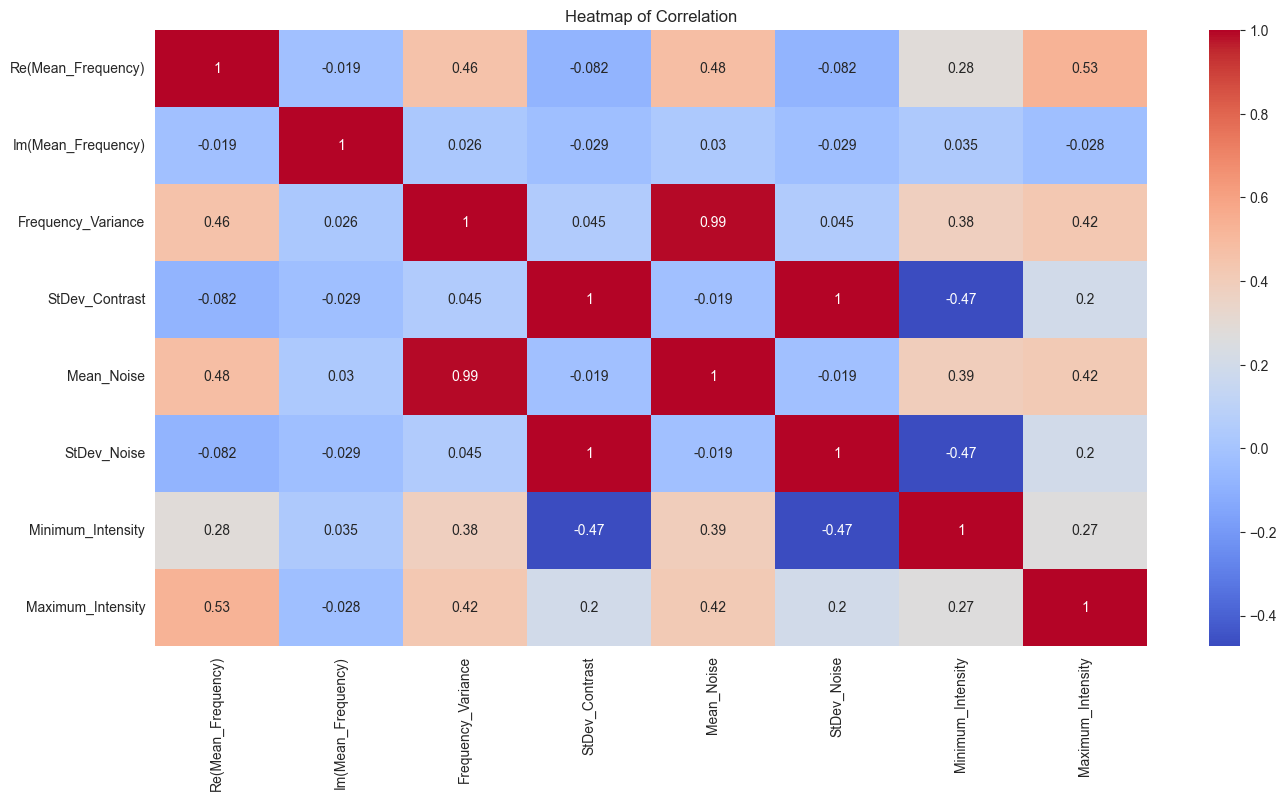

In [94]:
plt.figure(figsize=(16, 8))
sns.heatmap(Cherry_Dataset.select_dtypes(['float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')

Accuracy on training set: 0.835
Accuracy on test set: 0.788


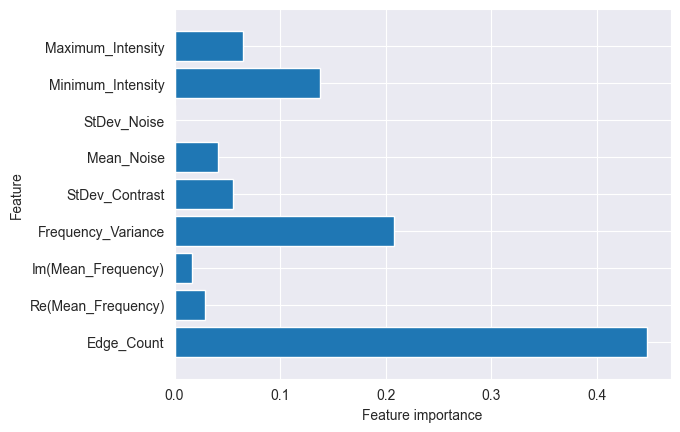

In [97]:
Label_Encoder = LabelEncoder()

X = Cherry_Dataset.drop(columns=['Disease', 'Is_Healthy'])
Y = Cherry_Dataset.Disease
Y = Label_Encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
XGBoost = XGBClassifier(n_estimators=32, max_depth=4, learning_rate=0.1).fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(XGBoost.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(XGBoost.score(X_test, Y_test)))

plot_feature_importance(XGBoost)